2023-04-18 08:54:23.589 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


Learning rate set to 0.5
0:	learn: 0.8311688	total: 140ms	remaining: 562ms
1:	learn: 0.8441558	total: 141ms	remaining: 212ms
2:	learn: 0.8571429	total: 142ms	remaining: 94.5ms
3:	learn: 0.8744589	total: 142ms	remaining: 35.6ms
4:	learn: 0.8614719	total: 143ms	remaining: 0us


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Learning rate set to 0.269978
0:	learn: 1.0000000	total: 501us	remaining: 2ms
1:	learn: 0.9583333	total: 1.01ms	remaining: 1.51ms
2:	learn: 1.0000000	total: 1.39ms	remaining: 926us
3:	learn: 1.0000000	total: 1.78ms	remaining: 444us
4:	learn: 1.0000000	total: 2.28ms	remaining: 0us
Learning rate set to 0.366178
0:	learn: 0.7959184	total: 491us	remaining: 1.97ms
1:	learn: 0.8775510	total: 814us	remaining: 1.22ms
2:	learn: 0.8979592	total: 1.1ms	remaining: 735us
3:	learn: 0.9387755	total: 1.41ms	remaining: 352us
4:	learn: 0.9387755	total: 1.72ms	remaining: 0us
Learning rate set to 0.436657
0:	learn: 0.9054054	total: 616us	remaining: 2.47ms
1:	learn: 0.8783784	total: 1.04ms	remaining: 1.56ms
2:	learn: 0.8918919	total: 1.41ms	remaining: 943us
3:	learn: 0.9189189	total: 1.79ms	remaining: 447us
4:	learn: 0.9054054	total: 2.17ms	remaining: 0us
Learning rate set to 0.492303
0:	learn: 0.8877551	total: 543us	remaining: 2.17ms
1:	learn: 0.8775510	total: 950us	remaining: 1.43ms
2:	learn: 0.8673469	t

Learning rate set to 0.5
0:	learn: 0.8139535	total: 734us	remaining: 2.94ms
1:	learn: 0.7965116	total: 1.2ms	remaining: 1.8ms
2:	learn: 0.8546512	total: 1.64ms	remaining: 1.09ms
3:	learn: 0.8779070	total: 2.03ms	remaining: 507us
4:	learn: 0.8895349	total: 2.45ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8426396	total: 763us	remaining: 3.05ms
1:	learn: 0.8426396	total: 1.37ms	remaining: 2.06ms
2:	learn: 0.8477157	total: 1.9ms	remaining: 1.26ms
3:	learn: 0.8578680	total: 2.35ms	remaining: 586us
4:	learn: 0.8527919	total: 2.92ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8603604	total: 898us	remaining: 3.59ms
1:	learn: 0.8558559	total: 1.68ms	remaining: 2.52ms
2:	learn: 0.8873874	total: 2.39ms	remaining: 1.59ms
3:	learn: 0.8918919	total: 2.89ms	remaining: 722us
4:	learn: 0.8963964	total: 3.53ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.8663968	total: 776us	remaining: 3.1ms
1:	learn: 0.8582996	total: 1.46ms	remaining: 2.19ms
2:	learn: 0.8785425	total: 2.03ms	re

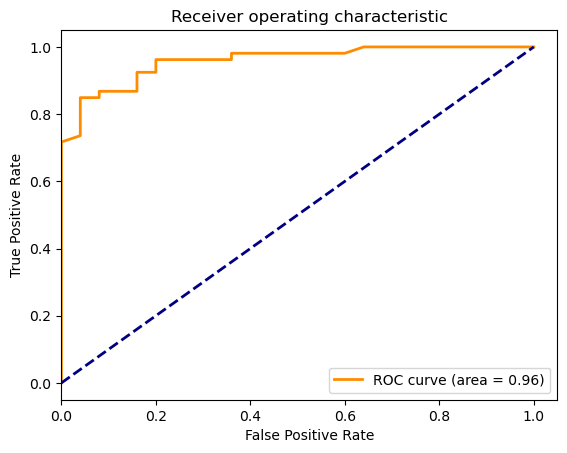

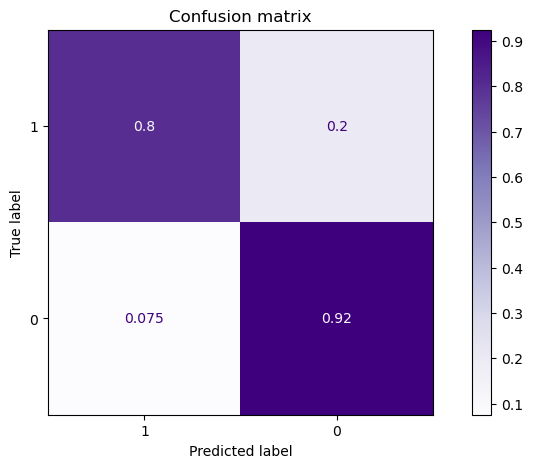

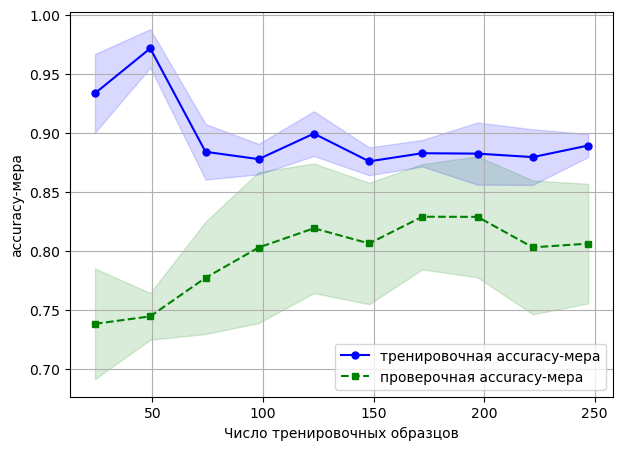

In [1]:
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from catboost import Pool, CatBoostClassifier

def load():
    col_list = ['Pelvic_incidence',
                'Pelvic_tilt',
                'Lumbar_lordosis_angle',
                'Sacral_slope',
                'Pelvic_radius',
                'Degree_spondylolisthesis',
                'Pelvic_slope',
                'Direct_tilt',
                'Thoracic_slope',
                'Cervical_tilt',
                'Sacrum_angle',
                'Scoliosis_slope',
                'Class_att',
                'To_drop']
    data = pd.read_csv('/Users/ARSQy/Documents/This semester studies/ТМО/Лаба 6/Dataset_spine.csv', names=col_list, header=1, sep=",")
    data.drop('To_drop', axis=1, inplace=True)
    return data

# Готовим данные к ML
def preprocess_data(data):
    scale_cols = ['Pelvic_incidence',
                  'Pelvic_tilt',
                  'Lumbar_lordosis_angle',
                  'Sacral_slope',
                  'Pelvic_radius',
                  'Degree_spondylolisthesis',
                  'Pelvic_slope',
                  'Direct_tilt',
                  'Thoracic_slope',
                  'Cervical_tilt',
                  'Sacrum_angle',
                  'Scoliosis_slope']
    sc1 = MinMaxScaler()
    sc1_data = sc1.fit_transform(data[scale_cols])
    for i in range(len(scale_cols)):
        data[scale_cols[i]] = sc1_data[:, i]
    data['Class_att'] = data['Class_att'].map({'Abnormal': 1, 'Normal': 0})
    # Разделим данные на целевой столбец и признаки
    X = data.drop("Class_att", axis=1)
    Y = data["Class_att"]
    # С использованием метода train_test_split разделим выборку на обучающую и тестовую
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
    return X_train, X_test, Y_train, Y_test

# Отрисовка графика ROC_CURVE
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score,
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    # plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

# Вывод метрик ML
def print_metrics(X_train, Y_train, X_test, Y_test, clf):
    clf.fit(X_train, Y_train)
    target = clf.predict(X_test)
    test_score = accuracy_score(Y_test, target)
    roc_res = clf.predict_proba(X_test)
    roc_auc = roc_auc_score(Y_test, roc_res[:, 1])
    f1_test_score = f1_score(Y_test, target)
    st.write(f"accuracy (точность): {test_score}")
    st.write(f"f1 метрика: {f1_test_score}")
    st.write(f"ROC AUC: {roc_auc}")
    fig1, ax1 = plt.subplots()
    draw_roc_curve(Y_test, roc_res[:, 1], ax1)
    st.pyplot(fig1)
    fig2, ax2 = plt.subplots(figsize=(10, 5))
    plot_confusion_matrix(clf, X_test, Y_test, ax=ax2, display_labels=['1', '0'], cmap = 'Purples', normalize='true')
    ax2.set(title="Confusion matrix")
    st.pyplot(fig2)
    return test_score

# Вывод кривой обучения
def plot_learning_curve(data_X, data_y, clf, name='accuracy', scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(estimator=clf, scoring=scoring, X=data_X, y=data_y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    fig = plt.figure(figsize=(7, 5))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label=f'тренировочная {name}-мера')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label=f'проверочная {name}-мера')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Число тренировочных образцов')
    plt.ylabel(f'{name}-мера')
    st.pyplot(fig)
    
if __name__ == '__main__':
    st.title('Метод градиентного бустинга')
    data = load()
    data_X_train, data_X_test, data_y_train, data_y_test = preprocess_data(data)

    # Будем показывать матрицу только по запросу, чттобы не тормозить процесс
    if st.checkbox('Показать корреляционную матрицу'):
        fig_corr, ax = plt.subplots(figsize=(20, 20))
        sns.heatmap(data.corr(), annot=True, cmap = 'Purples', fmt='.3f')
        st.pyplot(fig_corr)

    # Выбор гиперпараметров в сайдбаре
    st.sidebar.subheader('Гиперпараметры :')
    estimators = st.sidebar.slider('Количество деревьев: ', min_value=1, max_value=100, value=5, step=1)
    max_depth = st.sidebar.slider('Максимальная глубина', min_value=1, max_value=10, value=4, step=1)
    eval_metric = st.sidebar.selectbox('Оптимизируемая метрика:', ('Accuracy', 'F1', 'AUC'))

    # Вывод результатов
    translation_dict = {'Accuracy': 'accuracy', 'F1': 'f1', 'AUC': 'roc_auc'}
    gd = CatBoostClassifier(n_estimators=estimators, max_depth=max_depth, eval_metric=eval_metric, random_state=1)
    result = print_metrics(data_X_train, data_y_train, data_X_test, data_y_test, gd)
    data_X = pd.concat([data_X_train, data_X_test])
    data_y = pd.concat([data_y_train, data_y_test])
    plot_learning_curve(data_X, data_y, gd, name=translation_dict.get(eval_metric), scoring=translation_dict.get(eval_metric))
    # Показать данные
    if st.checkbox('Показать первые 10 строк датасета "Dataset_spine"'):
        st.write(data.head(10))

In [2]:
streamlit run l6.ipynb

SyntaxError: invalid syntax (138438065.py, line 1)